### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Text(0.5, 1.0, 'The missing data in coupons dataset')

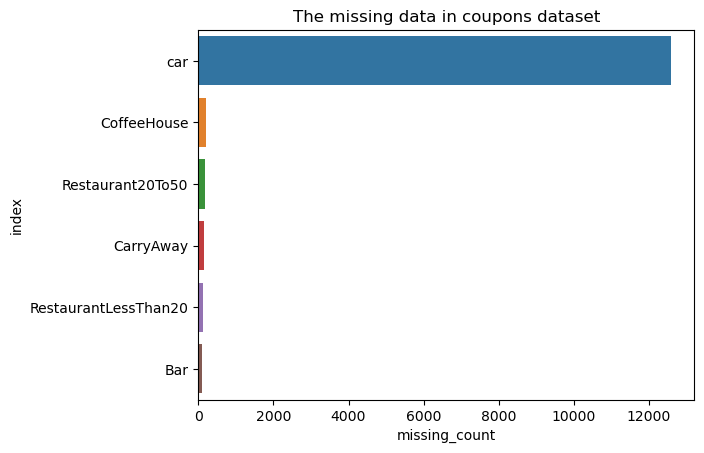

In [37]:
# handle missing or problematic data
#data.info()
missingvals = data.isnull().sum()
df0 = missingvals.sort_values(ascending=False).to_frame().reset_index()
df0.rename(columns={0:'missing_count'}, inplace=True)
df0 = df0[df0['missing_count'] != 0]
sns.barplot(df0, y='index', x='missing_count')
plt.title('The missing data in coupons dataset')

3. Decide what to do about your missing data -- drop, replace, other...

In [38]:
# replace missing data with good values
missingvals = data.isnull().sum()
df0 = missingvals.sort_values(ascending=False).to_frame().reset_index()
df0.rename(columns={0:'missing_count'}, inplace=True)
df0 = df0[df0['missing_count'] != 0]
print('Before data cleanup, missing_count = ' + str(df0['missing_count'].sum()))
print(df0)
# copy data
data1 = data
# rename column name from passanger to passenger
data1 = data1.rename(columns={'passanger':'passenger'})
# replace missing data
data1['car'].fillna('auto', inplace=True)
data1.fillna('never', inplace=True)
# verify now data is clean
missingvals1 = data1.isnull().sum()
df1 = missingvals1.sort_values(ascending=False).to_frame().reset_index()
df1.rename(columns={0:'missing_count'}, inplace=True)
df1 = df1[df1['missing_count'] != 0]
print('')
print('After data cleanup, missing_count = ' + str(df1.shape[0]))


Before data cleanup, missing_count = 13370
                  index  missing_count
0                   car          12576
1           CoffeeHouse            217
2      Restaurant20To50            189
3             CarryAway            151
4  RestaurantLessThan20            130
5                   Bar            107

After data cleanup, missing_count = 0


4. What proportion of the total observations chose to accept the coupon? 



Coupon accepted = 7210 out of 12684 (56.84326710816777%)


Text(0.5, 1.0, 'Overall Coupon Accepted Chart')

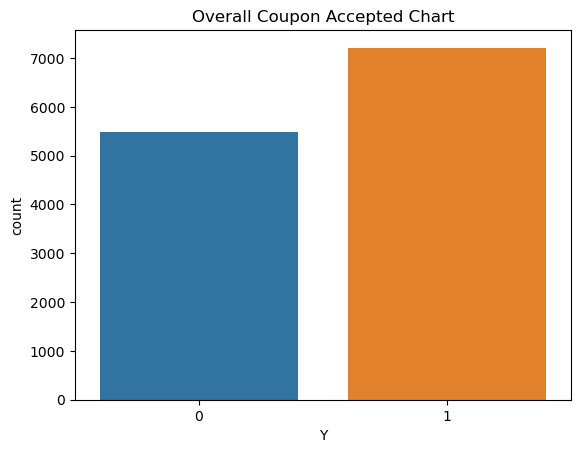

In [39]:
df3 = data1.query('Y == 1')
print("Coupon accepted = " + str(df3.shape[0]) + " out of " + str(data1.shape[0]) + " (" + str(df3.shape[0]/data1.shape[0]*100) + "%)")
sns.countplot(data=data1, x='Y')
plt.title('Overall Coupon Accepted Chart')

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Different Types of Coupons Bar Chart')

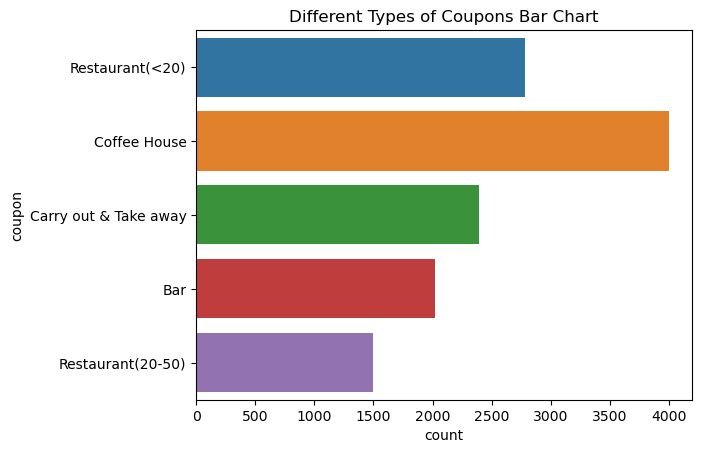

In [40]:
sns.countplot(data=data1, y='coupon')
plt.title('Different Types of Coupons Bar Chart')

6. Use a histogram to visualize the temperature column.

C:\Users\twyin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The Temperature Column Histogram Chart')

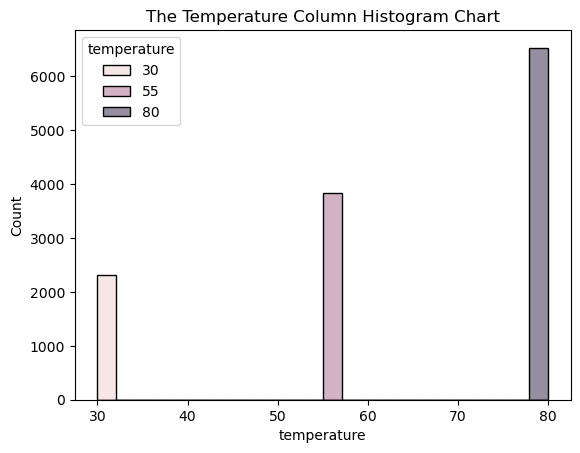

In [41]:
sns.histplot(data=data1, x='temperature', hue='temperature')
plt.title('The Temperature Column Histogram Chart')

7. Use a histogram to visualize the weather column.

C:\Users\twyin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The Weather Column Histogram Chart')

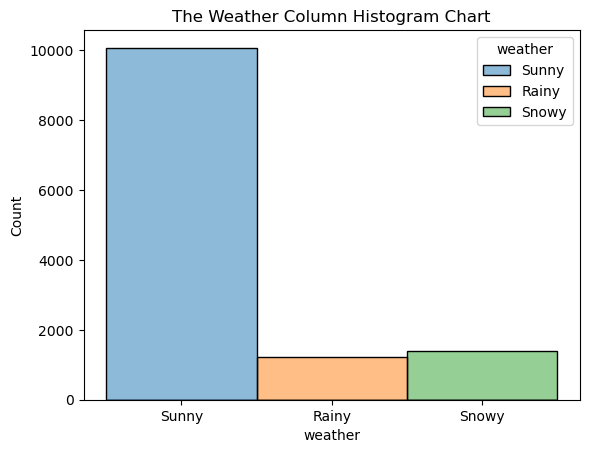

In [42]:
sns.histplot(data=data1, x='weather', hue='weather')
plt.title('The Weather Column Histogram Chart')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [43]:
dfbar = data1.query('coupon == "Bar"')
print(type(dfbar))
dfbar.head()

<class 'pandas.core.frame.DataFrame'>


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [44]:
df5 = dfbar.query('Y == 1')
print("Bar Coupon accepted = " + str(df5.shape[0]) + " out of " + str(dfbar.shape[0]) + " (" +  str(df5.shape[0]/dfbar.shape[0]*100) + "%)")


Bar Coupon accepted = 827 out of 2017 (41.00148735746158%)


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [46]:
# compute bar coupon accepted rates
df6a = dfbar.query('Bar != "4~8" and Bar != "gt8"')
df6b = df6a.query('Y == 1')
print("Bar Coupon accepted = " + str(df6b.shape[0]) + " out of " + str(df6a.shape[0]) + " (" +  str(df6b.shape[0]/df6a.shape[0]*100) + "%) " +
      "when visited bar 3 or fewer times a month")
df6c = dfbar.query('Bar == "4~8" or Bar == "gt8"')
df6d = df6c.query('Y == 1')
print("Bar Coupon accepted = " + str(df6d.shape[0]) + " out of " + str(df6c.shape[0]) + " (" + str(df6d.shape[0]/df6c.shape[0]*100) + "%) " +
      "when visited bar 4 or more times a month")

Bar Coupon accepted = 674 out of 1818 (37.073707370737075%) when visited bar 3 or fewer times a month
Bar Coupon accepted = 153 out of 199 (76.88442211055276%) when visited bar 4 or more times a month


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [50]:
# compute bar coupon accepted rates 
df7a = dfbar.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"')
df7b = df7a.query('age != "21" and age != "below21"')
df7c = df7b.query('Y == 1')
print("Bar Coupon accepted = " + str(df7c.shape[0]) + " out of " + str(df7b.shape[0]) + " (" + str(df7c.shape[0]/df7b.shape[0]*100) + "%) " +
      "when visited bar more than once a month and age over 25")

Bar Coupon accepted = 292 out of 420 (69.52380952380952%) when visited bar more than once a month and age over 25


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [54]:
# compute bar coupon accepted rates 
df8a = dfbar.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"')
df8b = df8a.query('passenger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')
df8c = df8b.query('Y == 1')
print("Bar Coupon accepted = " + str(df8c.shape[0]) + " out of " + str(df8b.shape[0]) + " (" + str(df8c.shape[0]/df8b.shape[0]*100) + "%) " +
      "when visited bar more than once a month and passengers not kids, occupations other than farming, fishing or forestry")

Bar Coupon accepted = 393 out of 551 (71.32486388384754%) when visited bar more than once a month and passengers not kids, occupations other than farming, fishing or forestry


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [55]:
# compute bar coupon accepted rates
df8a = dfbar.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"')
df8b = df8a.query('passenger != "Kid(s)" and maritalStatus != "Widowed"')
df8c = df8b.query('Y == 1')
print("Bar Coupon accepted = " + str(df8c.shape[0]) + " out of " + str(df8b.shape[0]) + " (" + str(df8c.shape[0]/df8b.shape[0]*100) + "% " +
      "when visited bar more than once a month and passangers not kid, marital status not widowed")

Bar Coupon accepted = 393 out of 551 (71.32486388384754% when visited bar more than once a month and passangers not kid, marital status not widowed


In [56]:
# compute bar coupon accepted rates
df8a = dfbar.query('Bar == "1~3" or Bar == "4~8" or Bar == "gt8"')
df8b = df8a.query('age == "26" or age == "21" or age == "below21"')
df8c = df8b.query('Y == 1')
print("Bar Coupon accepted = " + str(df8c.shape[0]) + " out of " + str(df8b.shape[0]) + " (" + str(df8c.shape[0]/df8b.shape[0]*100) + "%) " +
      "when visited bar more than once a month and age under 30")

Bar Coupon accepted = 249 out of 345 (72.17391304347827%) when visited bar more than once a month and age under 30


In [58]:
# compute restaurant(<20) coupon accepted rates
df8a = dfbar.query('RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8"')
df8b = df8a.query('income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$37500 - $49999"')
df8c = df8b.query('Y == 1')
print("Restaurant(<20) Coupon accepted = " + str(df8c.shape[0]) + " out of " + str(df8b.shape[0]) + " (" +  str(df8c.shape[0]/df8b.shape[0]*100) + "%) " +
      "when visited Restaurant(<20) more than 4 times a month and income under 50K")

Restaurant(<20) Coupon accepted = 124 out of 271 (45.75645756457565%) when visited Restaurant(<20) more than 4 times a month and income under 50K


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [60]:
print("We can hypothesize that customers who accepted the bar coupons are those who visited bars more than 4 times a month and age under 30 or with adult passengers.")

We can hypothesize that customers who accepted the bar coupons are those who visited bars more than 4 times a month and age under 30 or with adult passengers.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

                  coupon  count     Y  Accepted Ratio
0                    Bar   2017   827        0.410015
1  Carry out & Take away   2393  1760        0.735478
2           Coffee House   3996  1995        0.499249
3      Restaurant(20-50)   1492   658        0.441019
4        Restaurant(<20)   2786  1970        0.707107

Coupon accepted ratio mean = 0.55857366637301
Coupon accepted ratio std = 0.15228731794298583


Text(0.5, 1.0, 'Coupon Type Accepted Ratio Chart')

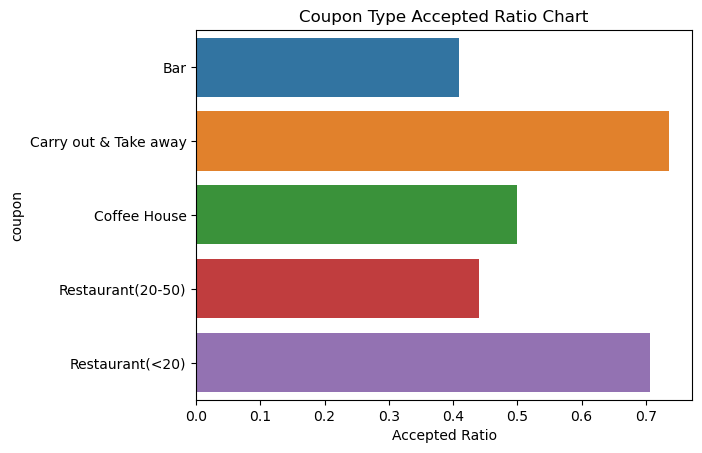

In [36]:
# compute coupon accepted rates vs coupon type
df5 = data1.groupby('coupon').sum()[['Y']].reset_index()
df6 = data1.groupby('coupon').count()[['Y']].reset_index()
df6.rename(columns={'Y':'count'}, inplace=True)
df6['Y'] = df5['Y']
df6['Accepted Ratio'] = df6['Y'] / df6['count']
print(df6)
print('')
print('Coupon accepted ratio mean = ' + str(df6['Accepted Ratio'].mean()))
print('Coupon accepted ratio std = ' + str(df6['Accepted Ratio'].std()))
sns.barplot(data=df6, y='coupon', x='Accepted Ratio')
plt.title('Coupon Type Accepted Ratio Chart')

1. Use a bar chart to visualize the coupon accepted rates vs time.

   time  count     Y  Accepted Ratio
0  10AM   2275  1384        0.608352
1  10PM   2006  1020        0.508475
2   2PM   2009  1329        0.661523
3   6PM   3230  1888        0.584520
4   7AM   3164  1589        0.502212

Coupon accepted ratio mean = 0.5730163767372156
Coupon accepted ratio std = 0.06781079270315157


Text(0.5, 1.0, 'Coupon Accepted Time Chart')

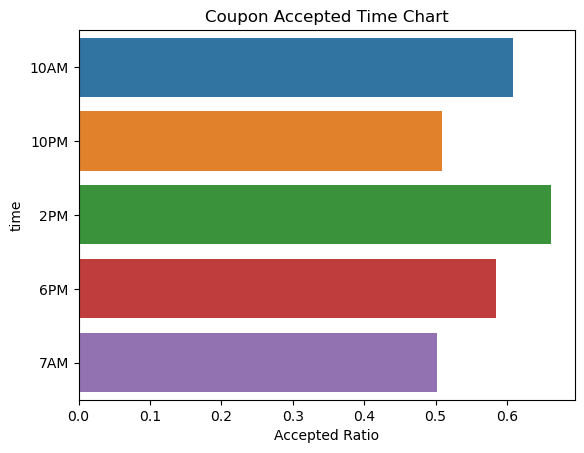

In [35]:
# compute coupon accepted rates vs time
df5 = data1.groupby('time').sum()[['Y']].reset_index()
df6 = data1.groupby('time').count()[['Y']].reset_index()
df6.rename(columns={'Y':'count'}, inplace=True)
df6['Y'] = df5['Y']
df6['Accepted Ratio'] = df6['Y'] / df6['count']
print(df6)
print('')
print('Coupon accepted ratio mean = ' + str(df6['Accepted Ratio'].mean()))
print('Coupon accepted ratio std = ' + str(df6['Accepted Ratio'].std()))
sns.barplot(data=df6, y='time', x='Accepted Ratio')
plt.title('Coupon Accepted Time Chart')

2. Compare the acceptance rates between those drivers who:

- go to take out restaurants more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to take out restaurants more than once a month and are under the age of 30 

In [34]:
# compute take out restaurant coupon accepted rates
dfcca = data1.query('coupon == "Carry out & Take away"')
df8a = dfcca.query('CarryAway == "1~3" or CarryAway == "4~8" or CarryAway == "gt8"')
df8b = df8a.query('passenger == "Kid(s)" or passenger == "Friend(s)"')
df8c = df8b.query('Y == 1')
print("CarryAway Coupon accepted = " + str(df8c.shape[0]) + " out of " + str(df8b.shape[0]) + " (" + str(df8c.shape[0]/df8b.shape[0] * 100) + "%) " +
      "when more than once a month and passengers are Kid(s) or Friend(s)")
df8b = df8a.query('age == "26" or age == "21" or age == "below21"')
df8c = df8b.query('Y == 1')
print("CarryAway Coupon accepted = " + str(df8c.shape[0]) + " out of " + str(df8b.shape[0]) + " (" + str(df8c.shape[0]/df8b.shape[0] * 100) + "%) " +
      "when more than once a month and age uder 30")

CarryAway Coupon accepted = 565 out of 746 (75.73726541554959%) when more than once a month and passengers are Kid(s) or Friend(s)
CarryAway Coupon accepted = 672 out of 913 (73.60350492880613%) when more than once a month and age uder 30


1. Compare the acceptance rates between those drivers who:

- go to cheap restaurants more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to cheap restaurants more than once a month and are under the age of 30 


In [33]:
# compute restaurant(<20) coupon accepted rates
dfcrt = data1.query('coupon == "Restaurant(<20)"')
df8a = dfcrt.query('RestaurantLessThan20 == "1~3" or RestaurantLessThan20 == "4~8" or RestaurantLessThan20 == "gt8"')
df8b = df8a.query('passenger == "Kid(s)" or passenger == "Friend(s)"')
df8c = df8b.query('Y == 1')
print("Restaurant(<20) Coupon accepted = " + str(df8c.shape[0]) + " out of " + str(df8b.shape[0]) + " (" + str(df8c.shape[0]/df8b.shape[0] * 100) + "%) " +
      "when more than once a month and passengers are Kid(s) or Friend(s)")
df8b = df8a.query('age == "26" or age == "21" or age == "below21"')
df8c = df8b.query('Y == 1')
print("Restaurant(<20) Coupon accepted = " + str(df8c.shape[0]) + " out of " + str(df8b.shape[0]) + " (" + str(df8c.shape[0]/df8b.shape[0] * 100) + "%) " +
      "when more than once a month and age uder 30")

Restaurant(<20) Coupon accepted = 690 out of 872 (79.12844036697247%) when more than once a month and passengers are Kid(s) or Friend(s)
Restaurant(<20) Coupon accepted = 750 out of 1000 (75.0%) when more than once a month and age uder 30


# Summary

In general, the average coupon acceptance ratio is low while customers are driving in different scenarios. However, we see coupon acceptance ratio increases to more than 70% when we target a special group of customers. For instance, customers who visited bars more often and age under 30 have a higher ratio to accept bar coupons. This indicates that we should associate coupon types with customer shopping bahaviors and their characteristics in order to improve acceptance ratio.